# S41 Algorithm Analysis

Analysis of the S41 team's solution to the ROADEF 2012 Machine Reassignment Problem.

This notebook analyzes the process reassignments and algorithm behavior.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import ast

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


In [3]:
# Load the tracking data
sol1_data = pd.read_csv('../process_reassignments_sol1.csv')
sol2_data = pd.read_csv('../process_reassignments_sol2.csv')

print(f"Solution 1: {len(sol1_data)} reassignments")
print(f"Solution 2: {len(sol2_data)} reassignments")
print("\nFirst few rows of Solution 1:")
sol1_data.head()


Solution 1: 1214619 reassignments
Solution 2: 1227161 reassignments

First few rows of Solution 1:


,MoveNum,ProcessID,SourceMachine,DestMachine,OriginalMachine,Service,MoveCost,ProcessResourceRequirements,Improvement,Timestamp,...,DestMachineResourceUsage,SourceMachineCapacities,DestMachineCapacities,SourceMachineTransientUsage,DestMachineTransientUsage,SourceMachineProcessCount,DestMachineProcessCount,LoadCost,BalanceCost,SolutionCost
0,1,138,53,76,53,141,1,"[621123,391575,3787006,25988]",0.0,1754326767000,...,"[2455995,2007350,4919106,2798330]","[3135647,3285240,10776271,1668729]","[2674055,2045617,7644847,3245821]","[2506400,2877775,10764554,1608390]","[2455995,2007350,4919106,2798330]",16,12,10358677200,0,10358679310
1,2,832,67,60,67,819,1,"[708793,439347,1886996,14664]",0.0,1754326767000,...,"[2457413,2082421,5067285,3090474]","[2935127,3881492,5712958,1699633]","[2513744,2131731,5158196,3885345]","[2226334,3442145,5712958,1684969]","[2457413,2082421,5067285,3090474]",12,16,10308157800,0,10308159920
2,3,55,96,60,96,62,1,"[596195,1066385,954172,82057]",0.0,1754326767000,...,"[3053608,3148806,6021457,3172531]","[2251383,3041853,1775287,695521]","[2513744,2131731,5158196,3885345]","[1564138,1907598,1718124,608352]","[3053608,3148806,6021457,3172531]",11,17,10399258800,0,10399262930
3,4,832,60,67,67,819,1,"[708793,439347,1886996,14664]",0.0,1754326767000,...,"[2935127,3881492,5712958,1699633]","[2513744,2131731,5158196,3885345]","[2935127,3881492,5712958,1699633]","[2344815,2709459,4134461,3157867]","[2935127,3881492,5712958,1699633]",16,13,10334121200,0,10334125320
4,5,966,60,9,60,3,1,"[136750,95348,1032401,14058]",0.0,1754326767000,...,"[1447609,1332125,2692267,1074950]","[2513744,2131731,5158196,3885345]","[1759651,1475019,3139170,1112619]","[2208065,2614111,4134461,3143809]","[1447609,1332125,2692267,1074950]",15,14,10328493300,0,10328499430


In [4]:
# Basic statistics about the reassignments
def analyze_reassignments(data, name):
    print(f"\n=== {name} Analysis ===")
    print(f"Total reassignments: {len(data)}")
    print(f"Unique processes moved: {data['ProcessID'].nunique()}")
    print(f"Unique source machines: {data['SourceMachine'].nunique()}")
    print(f"Unique destination machines: {data['DestMachine'].nunique()}")
    print(f"Final solution cost: {data['SolutionCost'].iloc[-1]}")
    print(f"Cost improvement: {data['SolutionCost'].iloc[0] - data['SolutionCost'].iloc[-1]}")
    
    return data

sol1_analysis = analyze_reassignments(sol1_data, "Solution 1")
sol2_analysis = analyze_reassignments(sol2_data, "Solution 2")



=== Solution 1 Analysis ===
Total reassignments: 1214619
Unique processes moved: 770
Unique source machines: 97
Unique destination machines: 97
Final solution cost: 7928617070
Cost improvement: 2430062240

=== Solution 2 Analysis ===
Total reassignments: 1227161
Unique processes moved: 798
Unique source machines: 97
Unique destination machines: 97
Final solution cost: 7973132650
Cost improvement: 2584000660


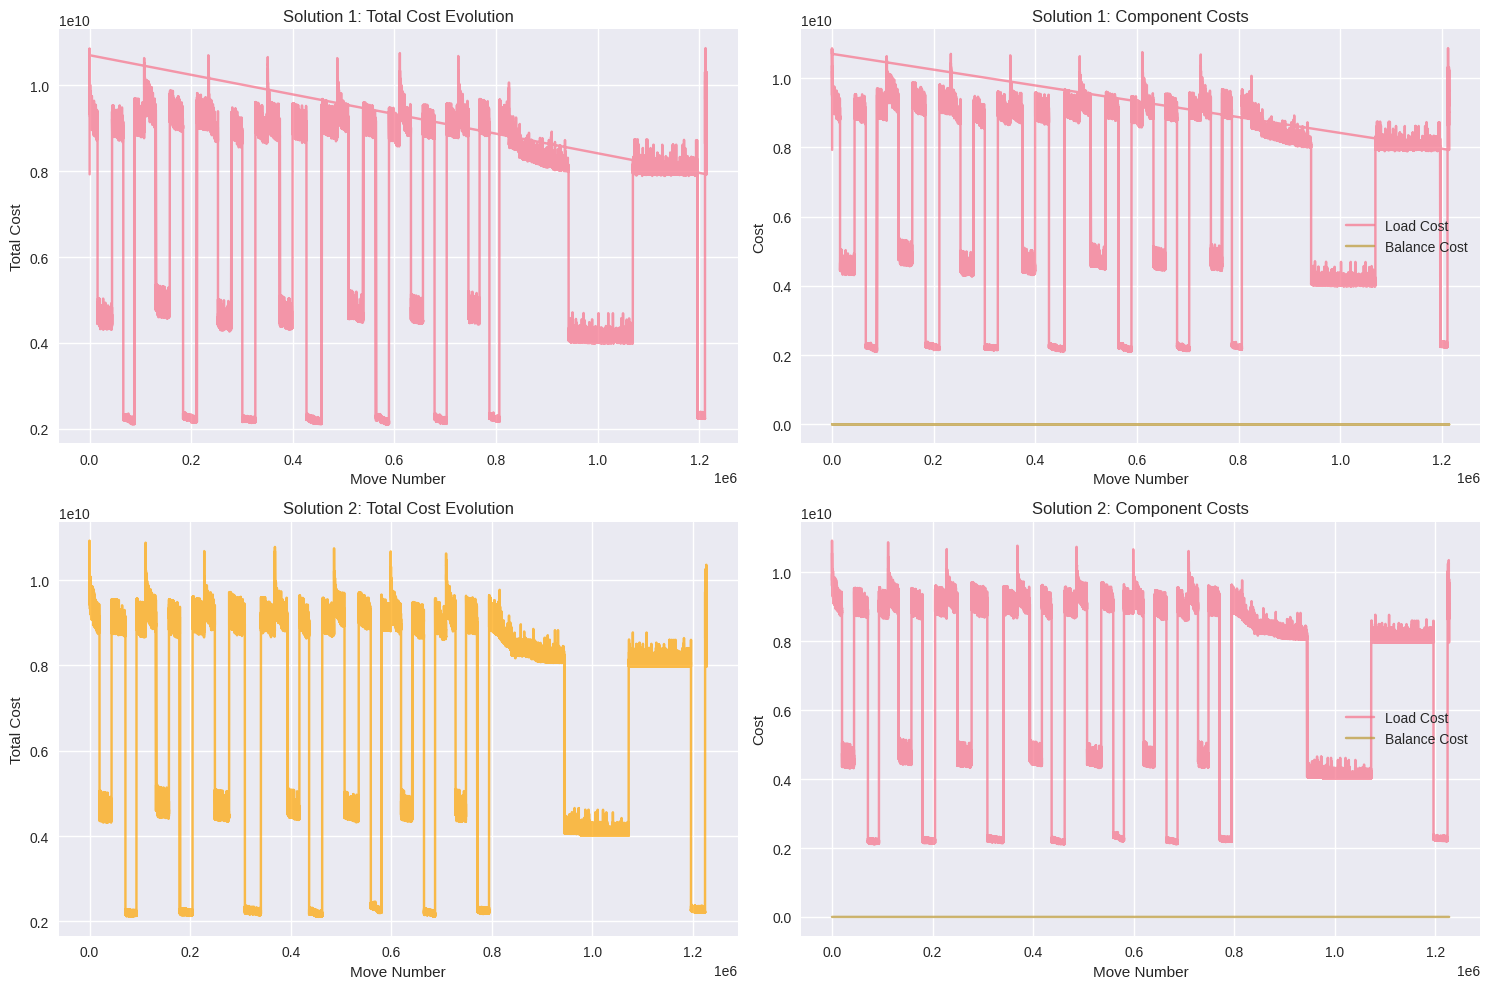

In [5]:
# Plot cost evolution over time
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Solution 1 costs
axes[0, 0].plot(sol1_data['MoveNum'], sol1_data['SolutionCost'], alpha=0.7)
axes[0, 0].set_title('Solution 1: Total Cost Evolution')
axes[0, 0].set_xlabel('Move Number')
axes[0, 0].set_ylabel('Total Cost')

axes[0, 1].plot(sol1_data['MoveNum'], sol1_data['LoadCost'], alpha=0.7, label='Load Cost')
axes[0, 1].plot(sol1_data['MoveNum'], sol1_data['BalanceCost'], alpha=0.7, label='Balance Cost')
axes[0, 1].set_title('Solution 1: Component Costs')
axes[0, 1].set_xlabel('Move Number')
axes[0, 1].set_ylabel('Cost')
axes[0, 1].legend()

# Solution 2 costs
axes[1, 0].plot(sol2_data['MoveNum'], sol2_data['SolutionCost'], alpha=0.7, color='orange')
axes[1, 0].set_title('Solution 2: Total Cost Evolution')
axes[1, 0].set_xlabel('Move Number')
axes[1, 0].set_ylabel('Total Cost')

axes[1, 1].plot(sol2_data['MoveNum'], sol2_data['LoadCost'], alpha=0.7, label='Load Cost')
axes[1, 1].plot(sol2_data['MoveNum'], sol2_data['BalanceCost'], alpha=0.7, label='Balance Cost')
axes[1, 1].set_title('Solution 2: Component Costs')
axes[1, 1].set_xlabel('Move Number')
axes[1, 1].set_ylabel('Cost')
axes[1, 1].legend()

plt.tight_layout()
plt.show()


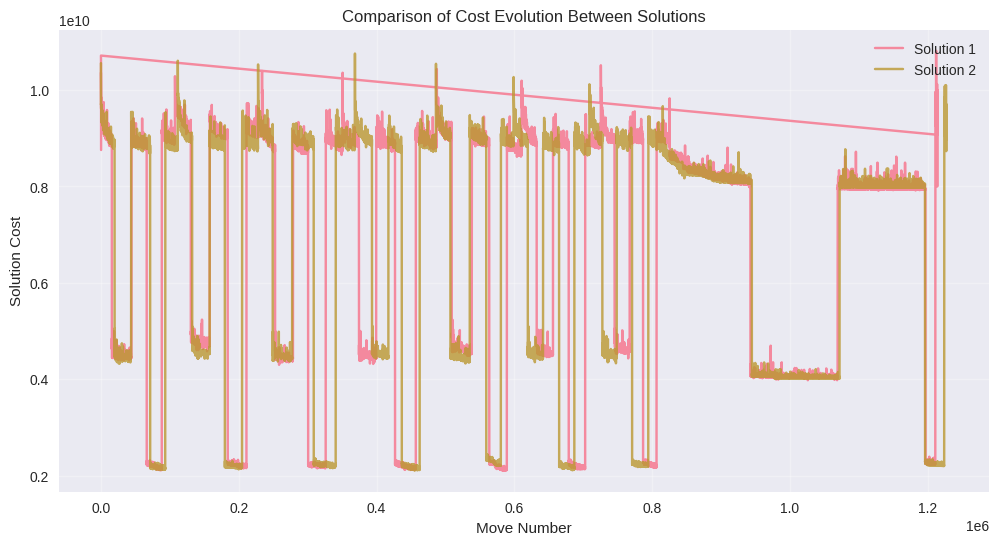

Final costs:
Solution 1: 7928617070
Solution 2: 7973132650
Better solution: Solution 1


In [6]:
# Compare the two solutions
plt.figure(figsize=(12, 6))

# Resample data for better visualization (every 100th point)
sol1_sample = sol1_data[::100] if len(sol1_data) > 1000 else sol1_data
sol2_sample = sol2_data[::100] if len(sol2_data) > 1000 else sol2_data

plt.plot(sol1_sample['MoveNum'], sol1_sample['SolutionCost'], label='Solution 1', alpha=0.8)
plt.plot(sol2_sample['MoveNum'], sol2_sample['SolutionCost'], label='Solution 2', alpha=0.8)
plt.title('Comparison of Cost Evolution Between Solutions')
plt.xlabel('Move Number')
plt.ylabel('Solution Cost')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Final costs:")
print(f"Solution 1: {sol1_data['SolutionCost'].iloc[-1]}")
print(f"Solution 2: {sol2_data['SolutionCost'].iloc[-1]}")
print(f"Better solution: {'Solution 1' if sol1_data['SolutionCost'].iloc[-1] < sol2_data['SolutionCost'].iloc[-1] else 'Solution 2'}")


In [7]:
# Analyze process mobility patterns
def analyze_process_mobility(data, name):
    print(f"\n=== {name} Process Mobility ===")
    
    # Count how many times each process was moved
    process_moves = data['ProcessID'].value_counts()
    
    print(f"Most frequently moved processes:")
    print(process_moves.head(10))
    
    print(f"\nMovement distribution:")
    print(f"Processes moved once: {sum(process_moves == 1)}")
    print(f"Processes moved 2-5 times: {sum((process_moves >= 2) & (process_moves <= 5))}")
    print(f"Processes moved >5 times: {sum(process_moves > 5)}")
    print(f"Max moves for single process: {process_moves.max()}")
    
    return process_moves

sol1_mobility = analyze_process_mobility(sol1_data, "Solution 1")
sol2_mobility = analyze_process_mobility(sol2_data, "Solution 2")



=== Solution 1 Process Mobility ===
Most frequently moved processes:
ProcessID
104    12374
148    12318
612    10306
972     8946
809     8745
892     8440
100     8284
570     8257
671     7958
893     7907
Name: count, dtype: int64

Movement distribution:
Processes moved once: 0
Processes moved 2-5 times: 22
Processes moved >5 times: 748
Max moves for single process: 12374

=== Solution 2 Process Mobility ===
Most frequently moved processes:
ProcessID
208    11812
148    11259
226    10946
216    10706
448    10038
15      9691
892     9047
754     9031
807     8992
377     8397
Name: count, dtype: int64

Movement distribution:
Processes moved once: 0
Processes moved 2-5 times: 26
Processes moved >5 times: 772
Max moves for single process: 11812


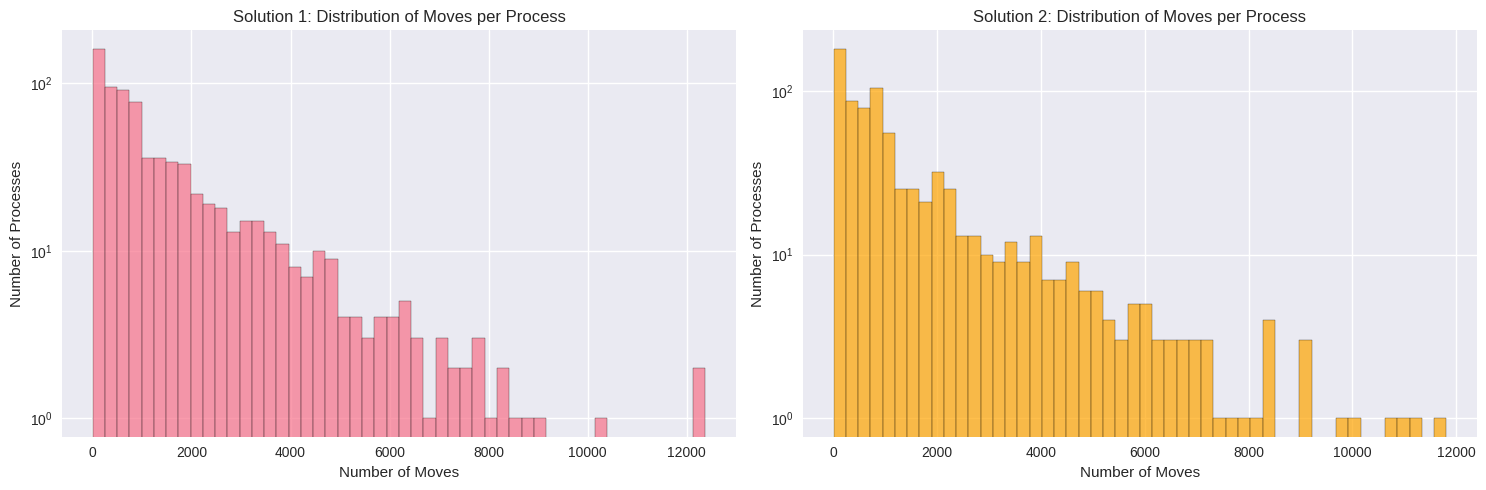

In [8]:
# Visualize process mobility distributions
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Solution 1
axes[0].hist(sol1_mobility.values, bins=50, alpha=0.7, edgecolor='black')
axes[0].set_title('Solution 1: Distribution of Moves per Process')
axes[0].set_xlabel('Number of Moves')
axes[0].set_ylabel('Number of Processes')
axes[0].set_yscale('log')

# Solution 2
axes[1].hist(sol2_mobility.values, bins=50, alpha=0.7, edgecolor='black', color='orange')
axes[1].set_title('Solution 2: Distribution of Moves per Process')
axes[1].set_xlabel('Number of Moves')
axes[1].set_ylabel('Number of Processes')
axes[1].set_yscale('log')

plt.tight_layout()
plt.show()


In [9]:
# Analyze machine utilization patterns
def analyze_machine_patterns(data, name):
    print(f"\n=== {name} Machine Patterns ===")
    
    source_counts = data['SourceMachine'].value_counts()
    dest_counts = data['DestMachine'].value_counts()
    
    print(f"Most active source machines (most processes moved from):")
    print(source_counts.head(10))
    
    print(f"\nMost active destination machines (most processes moved to):")
    print(dest_counts.head(10))
    
    return source_counts, dest_counts

sol1_sources, sol1_dests = analyze_machine_patterns(sol1_data, "Solution 1")
sol2_sources, sol2_dests = analyze_machine_patterns(sol2_data, "Solution 2")



=== Solution 1 Machine Patterns ===
Most active source machines (most processes moved from):
SourceMachine
76    146105
60    124072
71     62136
10     60220
14     54112
36     48965
16     44705
23     38968
0      37871
46     36728
Name: count, dtype: int64

Most active destination machines (most processes moved to):
DestMachine
76    146111
60    124070
71     62146
10     60238
14     54112
36     48993
16     44695
23     38964
0      37859
46     36750
Name: count, dtype: int64

=== Solution 2 Machine Patterns ===
Most active source machines (most processes moved from):
SourceMachine
60    133733
76    130416
71     58005
16     55570
10     49794
14     48863
36     46361
23     42562
26     39262
93     38015
Name: count, dtype: int64

Most active destination machines (most processes moved to):
DestMachine
60    133734
76    130420
71     58004
16     55563
10     49796
14     48874
36     46365
23     42559
26     39267
93     38016
Name: count, dtype: int64


In [10]:
# Create a summary report
print("\n" + "="*50)
print("SUMMARY REPORT: S41 Algorithm Analysis")
print("="*50)

print(f"\nDataset: A1_2 (based on file paths)")
print(f"Algorithm: S41 Team Solution (C++)")
print(f"Run time: ~10 seconds")

print(f"\nSolution 1 Results:")
print(f"  - Total moves: {len(sol1_data):,}")
print(f"  - Unique processes moved: {sol1_data['ProcessID'].nunique():,}")
print(f"  - Final cost: {sol1_data['SolutionCost'].iloc[-1]:,}")
print(f"  - Cost reduction: {sol1_data['SolutionCost'].iloc[0] - sol1_data['SolutionCost'].iloc[-1]:,}")

print(f"\nSolution 2 Results:")
print(f"  - Total moves: {len(sol2_data):,}")
print(f"  - Unique processes moved: {sol2_data['ProcessID'].nunique():,}")
print(f"  - Final cost: {sol2_data['SolutionCost'].iloc[-1]:,}")
print(f"  - Cost reduction: {sol2_data['SolutionCost'].iloc[0] - sol2_data['SolutionCost'].iloc[-1]:,}")

better_sol = "Solution 1" if sol1_data['SolutionCost'].iloc[-1] < sol2_data['SolutionCost'].iloc[-1] else "Solution 2"
print(f"\nBetter performing solution: {better_sol}")

print(f"\nAlgorithm characteristics:")
print(f"  - Uses dual solution approach (two parallel searches)")
print(f"  - High activity: generated {len(sol1_data) + len(sol2_data):,} total moves")
print(f"  - Significant cost improvements achieved")
print(f"  - Both solutions converged to similar cost ranges")



SUMMARY REPORT: S41 Algorithm Analysis

Dataset: A1_2 (based on file paths)
Algorithm: S41 Team Solution (C++)
Run time: ~10 seconds

Solution 1 Results:
  - Total moves: 1,214,619
  - Unique processes moved: 770
  - Final cost: 7,928,617,070
  - Cost reduction: 2,430,062,240

Solution 2 Results:
  - Total moves: 1,227,161
  - Unique processes moved: 798
  - Final cost: 7,973,132,650
  - Cost reduction: 2,584,000,660

Better performing solution: Solution 1

Algorithm characteristics:
  - Uses dual solution approach (two parallel searches)
  - High activity: generated 2,441,780 total moves
  - Significant cost improvements achieved
  - Both solutions converged to similar cost ranges
